In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

c:\users\public\wpython\v_3.7.6\soft\python-3.7.6.amd64\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Affichages des temps d'exécution

## Chargement des fichiers de reporting

In [63]:
data_dir = r"C:\Users\a072108\AppData\Local\Packages\CanonicalGroupLimited.Ubuntu_79rhkp1fndgsc\LocalState\rootfs\home\a072108\code\P8"

In [64]:
import glob

report_files = []
for file in glob.glob(data_dir+"/report/report_*.csv"):
    report_files.append(file)
report_files

['C:\\Users\\a072108\\AppData\\Local\\Packages\\CanonicalGroupLimited.Ubuntu_79rhkp1fndgsc\\LocalState\\rootfs\\home\\a072108\\code\\P8/report\\report_128_1_20221219_181713.csv',
 'C:\\Users\\a072108\\AppData\\Local\\Packages\\CanonicalGroupLimited.Ubuntu_79rhkp1fndgsc\\LocalState\\rootfs\\home\\a072108\\code\\P8/report\\report_128_1_20221219_190830.csv',
 'C:\\Users\\a072108\\AppData\\Local\\Packages\\CanonicalGroupLimited.Ubuntu_79rhkp1fndgsc\\LocalState\\rootfs\\home\\a072108\\code\\P8/report\\report_128_1_20221219_193621.csv',
 'C:\\Users\\a072108\\AppData\\Local\\Packages\\CanonicalGroupLimited.Ubuntu_79rhkp1fndgsc\\LocalState\\rootfs\\home\\a072108\\code\\P8/report\\report_128_1_20221219_211008.csv',
 'C:\\Users\\a072108\\AppData\\Local\\Packages\\CanonicalGroupLimited.Ubuntu_79rhkp1fndgsc\\LocalState\\rootfs\\home\\a072108\\code\\P8/report\\report_128_2_20221219_183401.csv',
 'C:\\Users\\a072108\\AppData\\Local\\Packages\\CanonicalGroupLimited.Ubuntu_79rhkp1fndgsc\\LocalState\\r

In [65]:
df_report = pd.read_csv(report_files[0], sep=";")
for file in report_files[1:]:
    df = pd.read_csv(file, sep=";")
    df_report = pd.concat((df_report, df))
df_report

,Unnamed: 0,nb_images,nb_slaves,elapsed
0,0,128,1,48.196356
0,0,128,1,47.432647
0,0,128,1,48.215540
0,0,128,1,48.523732
0,0,128,2,43.584687
...,...,...,...,...
0,0,64,2,34.811053
0,0,64,3,34.048283
0,0,64,3,33.661364
0,0,64,3,32.879208


## Scalabilité sur le nombre de noeuds

In [76]:
plt.rcParams['figure.figsize'] = [5, 4]
plt.rcParams['axes.titlesize'] = 18
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
def plot_slave_scalability(df):
    for nb_img in df['nb_images'].unique():
        df_plot = df.loc[df['nb_images']==nb_img]
        fig = plt.figure()
        ax = sns.scatterplot(data=df_plot, x='nb_slaves', y='elapsed')
        plt.ylabel('elapsed (s)')
        plt.xticks([1, 2, 3])
        plt.title(f"Nb images : {nb_img}")
        plt.grid('on')        

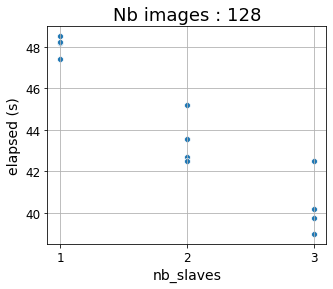

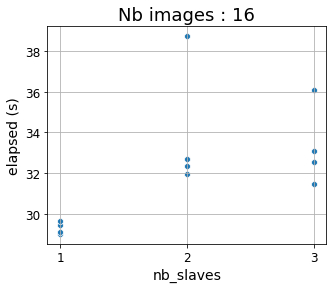

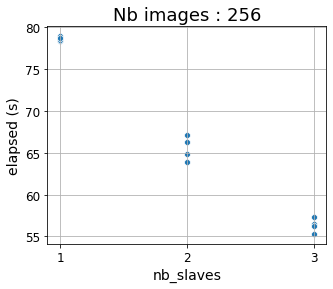

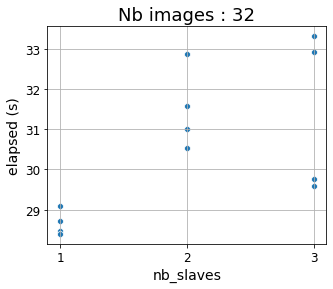

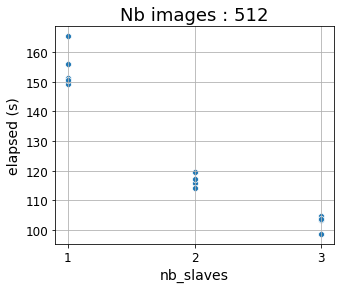

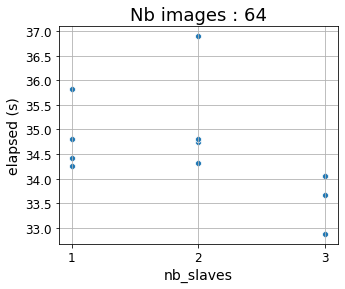

In [77]:
plot_slave_scalability(df_report)

## Scalabilité sur le nombre d'images

In [78]:
plt.rcParams['figure.figsize'] = [5, 4]
plt.rcParams['axes.titlesize'] = 18
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
def plot_image_scalability(df):
    for nb_img in df['nb_slaves'].unique():
        df_plot = df.loc[df['nb_slaves']==nb_img]
        fig = plt.figure()
        ax = sns.scatterplot(data=df_plot, x='nb_images', y='elapsed')
        plt.title(f"Nb slaves : {nb_img}")
        plt.ylabel('elapsed (s)')
        plt.grid('on')        

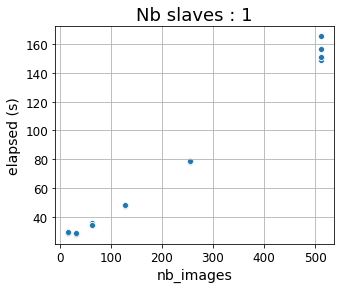

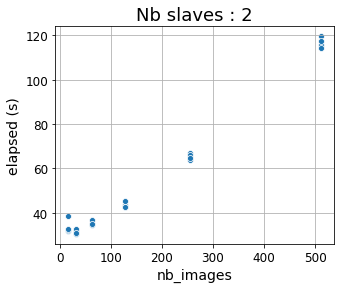

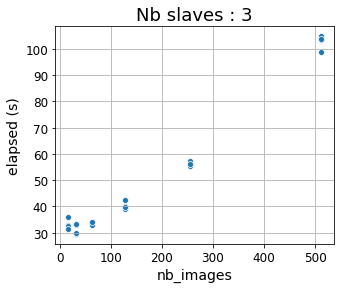

In [79]:
plot_image_scalability(df_report)

# Affichage de la réduction de dimension

In [43]:
pca_file = data_dir+"/pca/pca_512_3_20221219_214506.csv"

In [44]:
df_pca = pd.read_csv(pca_file, sep=";")
df_pca

,Unnamed: 0,F1,F2,Path
0,0,225.811000,-14.339949,s3://oc-ds-p8-fruits-project/data_512/cabbage_...
1,1,213.109186,-14.832273,s3://oc-ds-p8-fruits-project/data_512/cabbage_...
2,2,218.872776,-14.894765,s3://oc-ds-p8-fruits-project/data_512/cabbage_...
3,3,219.642002,-14.721818,s3://oc-ds-p8-fruits-project/data_512/cabbage_...
4,4,229.938386,-14.861990,s3://oc-ds-p8-fruits-project/data_512/cabbage_...
...,...,...,...,...
507,507,220.111371,-42.856017,s3://oc-ds-p8-fruits-project/data_512/apple_6/...
508,508,214.032375,-41.302466,s3://oc-ds-p8-fruits-project/data_512/apple_6/...
509,509,232.525792,-41.645309,s3://oc-ds-p8-fruits-project/data_512/apple_6/...
510,510,246.526538,-29.420536,s3://oc-ds-p8-fruits-project/data_512/apple_6/...


In [47]:
fruits = [f.split('/')[4] for f in df_pca['Path'].values]
fruits

['cabbage_white_1',
 'cabbage_white_1',
 'cabbage_white_1',
 'cabbage_white_1',
 'cabbage_white_1',
 'cabbage_white_1',
 'cabbage_white_1',
 'cabbage_white_1',
 'cabbage_white_1',
 'cabbage_white_1',
 'cabbage_white_1',
 'cabbage_white_1',
 'cabbage_white_1',
 'cabbage_white_1',
 'cabbage_white_1',
 'cabbage_white_1',
 'cabbage_white_1',
 'cabbage_white_1',
 'cabbage_white_1',
 'cabbage_white_1',
 'cabbage_white_1',
 'cabbage_white_1',
 'cabbage_white_1',
 'cabbage_white_1',
 'cabbage_white_1',
 'cabbage_white_1',
 'cabbage_white_1',
 'cabbage_white_1',
 'cabbage_white_1',
 'cabbage_white_1',
 'cabbage_white_1',
 'cabbage_white_1',
 'cabbage_white_1',
 'cabbage_white_1',
 'cabbage_white_1',
 'cabbage_white_1',
 'cabbage_white_1',
 'cabbage_white_1',
 'cabbage_white_1',
 'cabbage_white_1',
 'cabbage_white_1',
 'cabbage_white_1',
 'cabbage_white_1',
 'cabbage_white_1',
 'cabbage_white_1',
 'cabbage_white_1',
 'cabbage_white_1',
 'cabbage_white_1',
 'cabbage_white_1',
 'cabbage_white_1',


In [48]:
df_pca['Fruit'] = fruits

In [49]:
df_pca

,Unnamed: 0,F1,F2,Path,Fruit
0,0,225.811000,-14.339949,s3://oc-ds-p8-fruits-project/data_512/cabbage_...,cabbage_white_1
1,1,213.109186,-14.832273,s3://oc-ds-p8-fruits-project/data_512/cabbage_...,cabbage_white_1
2,2,218.872776,-14.894765,s3://oc-ds-p8-fruits-project/data_512/cabbage_...,cabbage_white_1
3,3,219.642002,-14.721818,s3://oc-ds-p8-fruits-project/data_512/cabbage_...,cabbage_white_1
4,4,229.938386,-14.861990,s3://oc-ds-p8-fruits-project/data_512/cabbage_...,cabbage_white_1
...,...,...,...,...,...
507,507,220.111371,-42.856017,s3://oc-ds-p8-fruits-project/data_512/apple_6/...,apple_6
508,508,214.032375,-41.302466,s3://oc-ds-p8-fruits-project/data_512/apple_6/...,apple_6
509,509,232.525792,-41.645309,s3://oc-ds-p8-fruits-project/data_512/apple_6/...,apple_6
510,510,246.526538,-29.420536,s3://oc-ds-p8-fruits-project/data_512/apple_6/...,apple_6


In [56]:
def display_factorial_planes(X_projected, n_comp, axis_ranks, labels=None, alpha=1, illustrative_var=None,
                            marker='o', s=72, xlim=None, ylim=None,
                            title_prefix='', title_suffix=''):
    """Affiche la projection des individus dans les plans principaux d'une PCA.
    
    Parameters
    ----------
    X_projected : numpy.array
        Coordonnées des composantes points projetés.
    n_comp : int
        Nombre de composantes principales de la PCA
    axis_ranks : list
        Liste des plans factorils à afficher (ex : [(0,1)], [(0,1), (2,3)] etc.).
    labels : list, optional
        Liste des noms de variables.
    alpha : float, optional
        Coefficient alpha du tracé graphique.
    illustrative_var : list, optional
        Liste des labels d'une variable illustrative.
    marker : str, optional
        Marqueur pour les points.
    s : int, optional
        Taille du label des noms de variables.
    xlims : list, optional
        Limites xmin, xmax.
    ylims
        Limites ymin, ymax.
    title_prefix : , optional
        Préfixe du titre du graphique.
    title_suffix : , optional
        Suffixe du titre du graphique.
    """
    for d1,d2 in axis_ranks:
        if d2 < n_comp:
 
            # initialisation de la figure       
            fig = plt.figure() #figsize=(15,15)
            # affichage des points
            if illustrative_var is None:
                plt.scatter(X_projected[:, d1], X_projected[:, d2], alpha=alpha, marker=marker, s=s)
            else:
                illustrative_var = np.array(illustrative_var)
                # print(np.unique(illustrative_var))
                for value in np.unique(illustrative_var):
                    # print(value)
                    selected = np.where(illustrative_var == value)
                    plt.scatter(X_projected[selected, d1], X_projected[selected, d2], alpha=alpha, label=value, 
                                marker=marker,s=s)

            # affichage des labels des points
            if labels is not None:
                for i,(x,y) in enumerate(X_projected[:,[d1,d2]]):
                    plt.text(x, y, labels[i],
                              fontsize='10', ha='center',va='center') 
                
            # détermination des limites du graphique
            boundary = np.max(np.abs(X_projected[:, [d1,d2]])) * 1.1
            if xlim:
                plt.xlim(xlim)
            else:
                plt.xlim([-boundary,boundary])
            if ylim:
                plt.ylim(ylim)
            else:
                plt.ylim([-boundary,boundary])

        
            # affichage des lignes horizontales et verticales
            plt.plot([-100, 100], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-100, 100], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel(f"F{d1+1}")
            plt.ylabel(f"F{d2+1}")

            plt.title(title_prefix+"Projection des individus (sur F{} et F{})".format(d1+1, d2+1)+title_suffix)
            if not illustrative_var is None:
                # plt.legend(markerscale=8, prop={'size': 15})
                plt.legend(prop={'size': 15})
            
            plt.show(block=False)


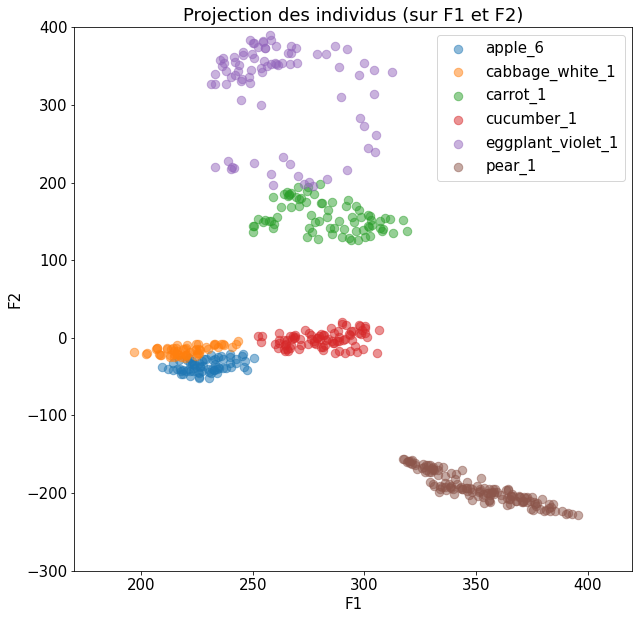

In [59]:
plt.rcParams['figure.figsize'] = [10, 10]
plt.rcParams['axes.titlesize'] = 18
plt.rcParams['axes.labelsize'] = 15
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams["legend.loc"] = 'best'
X_proj = df_pca[['F1', 'F2']].values
illustrative_var = df_pca['Fruit'].values
display_factorial_planes(X_proj, 2, [(0,1)], alpha=0.5, labels=None,
                         marker='o', s=72 , illustrative_var=illustrative_var,
                         xlim=[170.,420.], ylim=[-300.,400.]
                        )
plt.show()